__собираем статистики по объявлениям о продаже квартир__

_Evgeny S. Borisov <parser@mechanoid.su>_

In [1]:
!date

Пн 16 сен 2024 13:58:48 MSK


# загружаем данные

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
df = pd.read_pickle('data/2024/df_flat.pkl')
df['dt'] = df['ts'].dt.date
display( len(df) )
cols = ['title','address','latitude','longitude','priceM','dt']
display( df.sample(3)[cols] )

74010

title  \
65737  квартира-студия, 27,5 м², 4/9 эт.   
66445    2-к. квартира, 51,5 м², 4/9 эт.   
66999    3-к. квартира, 103 м², 2/10 эт.   

                                                        address   latitude  \
65737  севастополь,жк «доброгород» улица токарева,8 этап,блок 2    44.5807   
66445           севастополь,проспект октябрьской революции,40/9  44.588333   
66999             севастополь,проспект октябрьской революции,48   44.58893   

       longitude  priceM          dt  
65737  33.506621    4.87  2024-06-11  
66445  33.458247    7.90  2024-06-11  
66999   33.46193   17.30  2024-06-11

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74010 entries, 0 to 74009
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   url            74010 non-null  object        
 1   place          74010 non-null  object        
 2   title          74010 non-null  object        
 3   subtitle       26387 non-null  object        
 4   price          74010 non-null  int64         
 5   address        74010 non-null  object        
 6   description    74010 non-null  object        
 7   ts             74010 non-null  datetime64[us]
 8   nrooms         74010 non-null  int64         
 9   floor          74010 non-null  int64         
 10  nfloors        74010 non-null  int64         
 11  area           74010 non-null  float64       
 12  is_studio      74010 non-null  bool          
 13  is_apartment   74010 non-null  bool          
 14  is_part        74010 non-null  bool          
 15  is_auction     7401

In [5]:
# cols = ['title','address','latitude','longitude','priceM','dt','place','url']
# df[ (df['place']=='sevastopol') & (df['address'].str.match(r'.*Судак.*')) ][cols]

---

In [6]:
# df[ df['ts'].dt.date > pd.to_datetime('2024-01-01').date() ]

In [7]:
# df_ = pd.read_pickle('data/2023/data_flat.pkl').rename(columns={'adr':'address'})
# display( len(df_) )
# df_ = (
#         df_
#         .dropna(subset=['dt','url'])
#         .drop_duplicates(['dt','url'])
#         .drop(columns=['adr_orig','obj_name','avito_page','cian_page'])
#     )
# display( len(df_) )
# cols = ['title','address','latitude','longitude','priceM','dt','url']
# display( df_.sample(3)[cols] )

In [8]:
def address_filter(df):
    #           46.319437, 33.911048
    #
    # 45.402617, 32.455625 |  45.545301, 36.684702
    #
    #          44.320887, 33.917013

    df['latitude'] = pd.to_numeric( df['latitude'], errors='coerce' )
    df['longitude'] = pd.to_numeric( df['longitude'], errors='coerce' )

    df = df.query('(32.4<longitude<36.7) & (44.3<latitude<46.4)') 

#     df.loc[ df['url']=='https://avito.ru/2322251740', ['latitude','longitude']] = None

#     df.loc[ df['address']=='Севастополь,Чёрное море', ['latitude','longitude'] ] = None
#     df.loc[ df['address'].str.lower().str.match('чёрное море'), ['latitude','longitude'] ] = None 

#     df.loc[ df['address']=='квартал Старый Город', 'place'] = 'turkie'
#     df.loc[ df['address'].str.lower().str.match('анталья'), 'place' ] = 'turkie' 

#     df.loc[ df['address'].str.lower().str.match(r'.*бахчисарай.*'), 'place' ] = 'bahchisaray'
#     df.loc[ df['address'].str.lower().str.match(r'.*севастополь,.*'), 'place' ] = 'sevastopol'

#     df.loc[ df['address'].str.lower().str.match(r'.*мысовское.*'), 'place' ] = 'kerch'
#     df.loc[ df['address'].str.lower().str.match(r'.*алушта.*'), 'place' ] = 'alushta'
#     df.loc[ df['address'].str.lower().str.match(r'.*гурзуф.*'), 'place' ] = 'gurzuf'

#     df.loc[ df['address'].str.lower().str.match(r'.*с.лучистое.*'), 'place' ] = 'alushta'
#     df.loc[ df['address'].str.lower().str.match(r'.*снт солнечная долина.*'), 'place' ] = 'sudak'
#     df.loc[ df['address'].str.lower().str.match(r'.*пгт.новоозёрное.*'), 'place' ] = 'evpatoria'

#     df.loc[ df['address'].str.lower().str.match(r'.*с.мирное.*'), 'place' ] = 'simferopol'
#     df.loc[ df['address'].str.lower().str.match(r'.*тсн аэрофлот.*'), 'place' ] = 'simferopol'

#     df.loc[ df['address'].str.lower().str.match(r'.*семисот.*'), 'place' ] = 'kerch'

#     df.loc[ df['address'].str.lower().str.match(r'.*ялта.*') , 'place' ] = 'yalta'
#     df.loc[ df['address'].str.lower().str.match(r'.*феодосия.*') , 'place' ] = 'feodosia'
#     df.loc[ df['address'].str.lower().str.match(r'.*окуневка.*') , 'place' ] = 'tarkhankut'
#     df.loc[ df['address'].str.lower().str.match(r'.*заветное.*') , 'place' ] = 'kerch'
#     df.loc[ df['address'].str.lower().str.match(r'.*евпатория.*') , 'place' ] = 'evpatoria'
#     df.loc[ df['address'].str.lower().str.match(r'.*симферопольский район.*'), 'place' ] = 'simferopol'

#    df.loc[ df['address'].str.lower().str.match(r'.*c.симферопольский район.*'), 'place' ] = 'simferopol'

    df.loc[ df['address'].str.lower().str.match(r'.*судак,село радостное.*'), 'place' ] = 'st.krym'
    df = df.dropna(subset=['latitude','longitude'])
    
    return df

In [9]:
display( len(df) )
df = address_filter(df)
# history_date = df_['dt'].max()
# df = pd.concat([df,df_])
display( len(df) )
# del df_

74010

73085

----

In [10]:
df['month'] = df['ts'].dt.to_period('M')
df['week'] = df['ts'].dt.to_period('W')

In [11]:
# display( len(df) )
# df = df.dropna(subset=['latitude','longitude'])
# display( len(df) )

----

In [12]:
display(len(df))
# выкидываем "ущербные" варианты 
df = df.query('~(is_studio|is_apartment|is_part|is_auction|is_openspace|is_SNT|is_roof)&(nrooms>0)&(nrooms<4)')
display(len(df))
df = df.query('priceM>1.') # выкидываем предожения с аномально низкой ценой
display(len(df))

73085

35882

35881

In [13]:
gdf = gpd.GeoDataFrame( df, geometry = gpd.points_from_xy( df['longitude'], df['latitude']), crs='epsg:4326', )
# [['title','address','latitude','longitude','priceM']] 
display( gdf.sample(3)[cols])

title                               address  \
39303  2-к. квартира, 62 м², 3/3 эт.  севастополь,новороссийская улица ,18   
49810  3-к. квартира, 77 м², 3/3 эт.        севастополь,улица челнокова,39   
41737  3-к. квартира, 62 м², 3/3 эт.           севастополь,улица ленина,48   

       latitude  longitude  priceM          dt  
39303     44.61      33.52    9.80  2024-08-12  
49810     44.59      33.43    9.95  2024-08-06  
41737     44.61      33.53   12.70  2024-06-17

---

In [14]:
dt_max = df['dt'].max()
dt_min = df['dt'].min()
# display( dt_min,history_date,dt_max )
print( dt_min,' : ',dt_max )

2024-06-07  :  2024-09-16


In [15]:
# gdf_history = gdf.query(f'dt <= @history_date')
# gdf = gdf.query(f'dt > @history_date')

In [16]:
# display( len(gdf_history) )
display( len(gdf) )

35881

In [17]:
display( len(gdf) )
gdf = (
    gdf
    .query("place in ('sevastopol','sudak')")
    # .drop_duplicates(['dt','url'])
    .drop_duplicates(['url','week'])
    .reset_index(drop=True)
)
display( len(gdf) )

35881

29193

In [18]:
# # display( gdf.columns )

# display( len(gdf) )
# gdf = gdf.drop_duplicates(['url','week'])
# display( len(gdf) )

In [19]:
# gdf.columns

In [20]:
# цена за квадратный метр (тыс.руб.)
gdf['price_area_K'] = (gdf['price']/gdf['area'])/1_000

# общая статистика

In [21]:
gdf[['title','address','priceM','geometry']].sample(1024).explore()

In [22]:
gdf.query('place=="sevastopol"')[['title','address','priceM','geometry']].sample(1024).explore()

In [23]:
gdf.query('place=="sudak"')[['title','address','priceM','geometry']].explore()

In [24]:
# gdf_last[ gdf_last['address'].str.match(r'.*долина роз.*') ][['title','address','priceM','geometry','url']].explore()

---

In [25]:
percentiles=[.01,.05,.1,.25,.5,.75,.9,.95]
stat = (
        gdf
        .groupby(['place','nrooms','week'])
#         .groupby(['place','nrooms','month'])
        ['priceM'].describe(percentiles=percentiles)
    )
    
display( stat )

count  mean  std  min   1%   5%  10%  \
place      nrooms week                                                          
sevastopol 1      2024-06-03/2024-06-09 660.00  7.01 2.01 2.70 3.66 4.50 4.80   
                  2024-06-10/2024-06-16 960.00  7.11 1.96 2.70 3.88 4.50 4.90   
                  2024-06-17/2024-06-23 846.00  7.11 1.88 2.70 3.70 4.60 4.90   
                  2024-06-24/2024-06-30 664.00  7.15 1.88 2.70 3.66 4.56 4.92   
                  2024-07-08/2024-07-14 700.00  7.34 2.36 2.80 3.55 4.50 4.85   
...                                        ...   ...  ...  ...  ...  ...  ...   
sudak      3      2024-08-19/2024-08-25  32.00 10.72 5.70 3.60 3.63 3.87 4.29   
                  2024-08-26/2024-09-01  34.00 10.52 5.42 3.50 3.57 4.06 4.53   
                  2024-09-02/2024-09-08  37.00  9.96 5.55 3.50 3.54 3.68 4.15   
                  2024-09-09/2024-09-15  34.00  9.19 4.50 3.50 3.53 3.67 4.08   
                  2024-09-16/2024-09-22  37.00  9.57 5.30 3.50 3.54 3.68 4.15   

                                         25%  50%   75%   90%   95%   max  
place      nrooms week                                                     
sevastopol 1      2024-06-03/2024-06-09 5.50 6.85  7.95  9.49 10.70 18.99  
                  2024-06-10/2024-06-16 5.70 7.09  7.90  9.30 10.20 20.00  
                  2024-06-17/2024-06-23 5.75 7.08  8.08  9.22 10.20 20.00  
                  2024-06-24/2024-06-30 5.76 7.15  8.10  9.30 10.20 16.23  
                  2024-07-08/2024-07-14 5.70 7.25  8.21  9.80 11.28 19.71  
...                                      ...  ...   ...   ...   ...   ...  
sudak      3      2024-08-19/2024-08-25 8.57 9.60 12.00 15.45 22.47 30.00  
                  2024-08-26/2024-09-01 8.60 9.50 10.45 15.35 22.44 30.00  
                  2024-09-02/2024-09-08 7.50 9.30 10.50 15.20 22.46 30.00  
                  2024-09-09/2024-09-15 6.15 9.30  9.90 14.10 17.60 22.73  
                  2024-09-16/2024-09-22 7.50 9.30  9.90 11.16 22.46 30.00  

[90 rows x 13 columns]

In [26]:
import matplotlib.pyplot as plt

cols = ['1%','10%','25%','50%','75%']
sizes = stat.reset_index()['nrooms'].unique()

In [28]:
# history_date

place = 'sevastopol'

fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена на {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   
    ax[i].set_yticks( np.arange(2, 16, step=1) )

fig.suptitle(f'{place}, изменение цены на квартиры', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

In [30]:
fig, ax = plt.subplots(1,len(sizes),figsize=(12,5), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),'count'].plot(title=f'предложений {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   
#     ax[i].set_yticks( np.arange(2, 16, step=1) )


fig.suptitle(f'{place},изменение количества предложений на квартиры', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

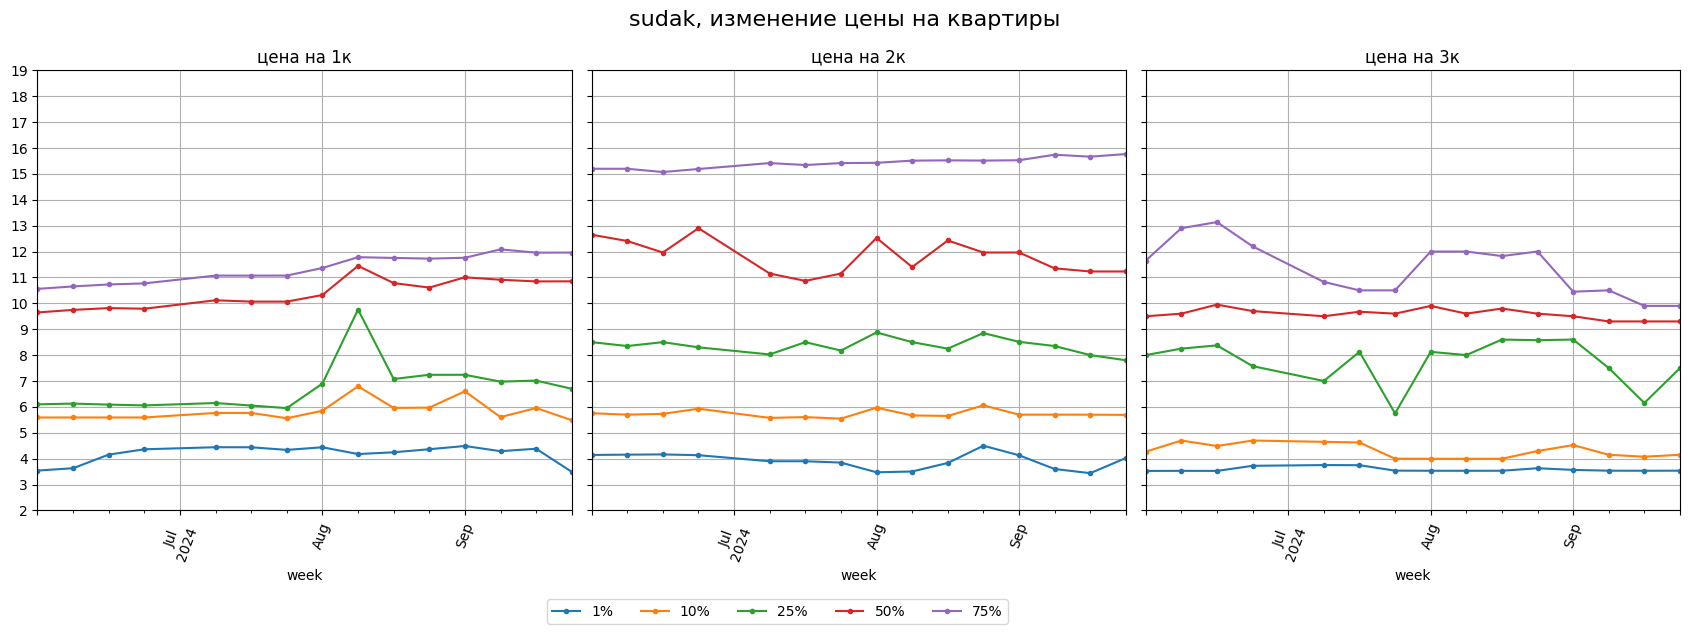

In [31]:
# history_date

place = 'sudak'

fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )
for i,s in enumerate(sizes): 
    stat.loc[(place,s),cols].plot(title=f'цена на {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   
    ax[i].set_yticks( np.arange(2, 20, step=1) )

fig.suptitle(f'{place}, изменение цены на квартиры', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

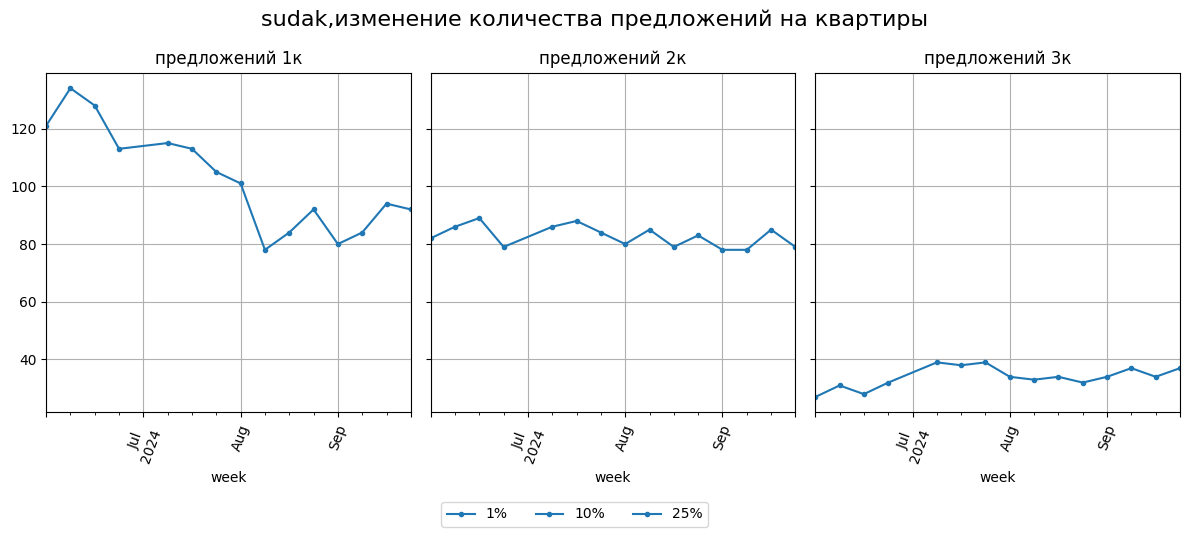

In [32]:
fig, ax = plt.subplots(1,len(sizes),figsize=(12,5), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(place,s),'count'].plot(title=f'предложений {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'{place},изменение количества предложений на квартиры', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

# актуальная цена

In [33]:
# sorted(gdf['dt'].unique() )

In [34]:
# dt_now = pd.to_datetime('2024-06-17').date()
dt_now = gdf['dt'].max()
display(len(gdf))
gdf_last = gdf[ gdf['dt'] == dt_now ]
display(len(gdf_last))

29193

1763

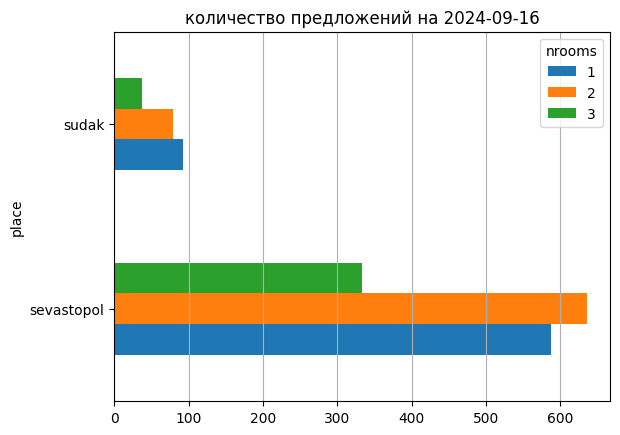

In [35]:
(
gdf_last
.drop_duplicates('url')
.groupby(['nrooms','place'])['url'].count().reset_index()
.pivot(index='place', columns='nrooms', values='url')
.plot.barh(title='количество предложений на '+ str(dt_now))
.grid(axis='x')    
)

In [36]:
(
    gdf_last
    .drop_duplicates('url')
    .groupby(['place','nrooms'])
    ['priceM'].describe(percentiles=percentiles)
)

count  mean    std  min   1%   5%  10%  25%   50%   75%  \
place      nrooms                                                            
sevastopol 1      587.00 27.19 494.98 2.70 3.39 4.46 4.80 5.49  6.40  7.80   
           2      635.00  9.08   3.40 3.50 4.74 5.50 5.95 6.80  8.50 10.30   
           3      333.00 11.44   6.04 4.30 5.20 6.50 7.30 8.30 10.20 12.70   
sudak      1       92.00  9.50   3.06 3.40 3.49 4.73 5.48 6.70 10.85 11.96   
           2       79.00 12.40   5.76 3.40 4.02 4.50 5.69 7.80 11.23 15.77   
           3       37.00  9.57   5.30 3.50 3.54 3.68 4.15 7.50  9.30  9.90   

                    90%   95%      max  
place      nrooms                       
sevastopol 1       9.30 10.20 11999.00  
           2      13.00 15.00    41.00  
           3      16.80 21.20    85.00  
sudak      1      12.54 12.79    17.39  
           2      21.15 23.65    25.71  
           3      11.16 22.46    30.00

In [37]:
q_95 = gdf_last.groupby(['place'])['priceM'].quantile(.95)

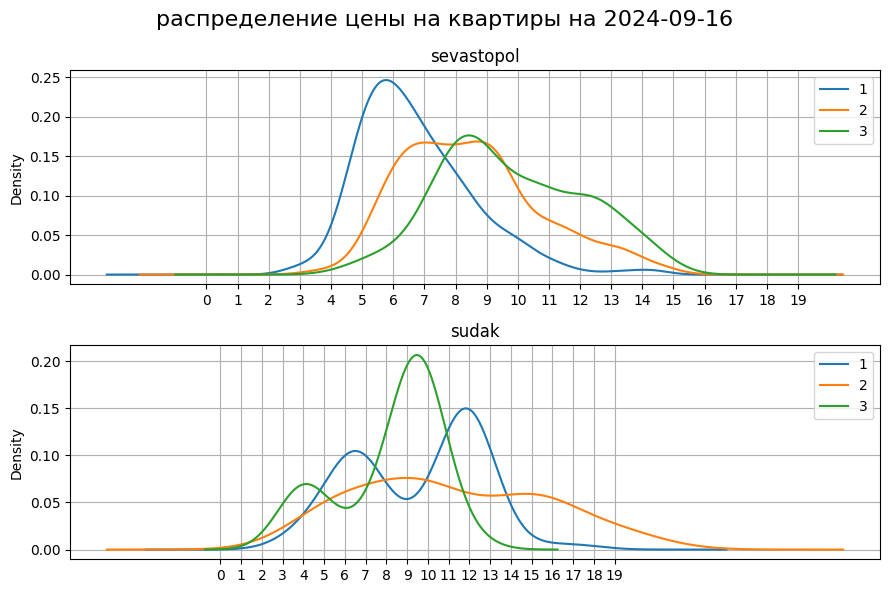

In [39]:
places = ['sevastopol','sudak',]
fig, ax = plt.subplots(len(places),1,figsize=(9,6)) #, sharex=True )
for i,p in enumerate(places): 
    (
        gdf_last
        .drop_duplicates('url')
        .query(f'(place=="{p}")&(priceM<{q_95[p]})')
        .groupby(['nrooms'],observed=True)
        ['priceM'].plot.kde(legend=True,ax=ax[i],title=f'{p}', grid=True)   
    )
    ax[i].set_xticks( np.arange(0, 20, step=1) )
fig.suptitle(f'распределение цены на квартиры на '+ str( gdf_last['dt'].max() ), fontsize=16)
fig.tight_layout()

# цены на карте

In [40]:
import h3
from shapely.geometry import Polygon
from shapely.geometry import MultiPoint

In [41]:
def cover_grid_hexagonal(gmtr,cell_size=6,crs='EPSG:4326'):
    polygonise = lambda hex_id: Polygon( h3.h3_to_geo_boundary( hex_id, geo_json=True)  )
    hexs = list(h3.polyfill( gmtr.__geo_interface__, cell_size, geo_json_conformant = True ))
    return gpd.GeoDataFrame({ 'hex_id': hexs,  'geometry': list(map(polygonise, hexs)), },crs=crs,)

## Севастополь

In [42]:
frame_sevastopol = gpd.GeoDataFrame([{ # все предложения
            'place':'sevastopol', 
            'geometry':MultiPoint( gdf_last.query('place=="sevastopol"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

# frame_sevastopol.explore()

In [43]:
grid = cover_grid_hexagonal( frame_sevastopol.geometry.values[0],cell_size=7 )

In [44]:
gdf_last.columns #[['']]

Index(['url', 'place', 'title', 'subtitle', 'price', 'address', 'description',
       'ts', 'nrooms', 'floor', 'nfloors', 'area', 'is_studio', 'is_apartment',
       'is_part', 'is_auction', 'is_openspace', 'is_roof', 'is_SNT', 'priceM',
       'is_last_floor', 'address_orig', 'place_', 'latitude', 'longitude',
       'dt', 'month', 'week', 'geometry', 'price_area_K'],
      dtype='object')

In [45]:
# медиана цены за квадратный метр (тыс.руб.)

grid_values = ( 
    grid
    .sjoin( gdf_last.drop_duplicates('url').query('place=="sevastopol"'), how='inner',)
    .groupby(['hex_id'])
    ['price_area_K']
    .median()
    .reset_index()
)
grid.merge(grid_values,on='hex_id').explore('price_area_K',cmap='rainbow') #'area_name', legend=True)

## Судак

In [46]:
frame_sudak = gpd.GeoDataFrame([{ # все предложения
            'place':'sudak', 
            'geometry':MultiPoint( gdf_last.query('place=="sudak"')['geometry'].tolist() ).convex_hull, 
        }],crs='EPSG:4326')

# frame_sudak.explore()

In [47]:
grid = cover_grid_hexagonal( frame_sudak.geometry.values[0],cell_size=9 )

In [48]:
# медиана цены за квадратный метр (тыс.руб.)
grid_values = ( 
    grid
    .sjoin( 
        gdf_last
        .drop_duplicates('url')
        .query('place=="sudak"'), how='inner',)
    .groupby(['hex_id'])
    ['price_area_K']
    .median()
    .reset_index()
)
grid.merge(grid_values,on='hex_id').explore('price_area_K',cmap='rainbow') #'area_name', legend=True)

# районы Севастополя

In [49]:
# загружаем области поиска
frames_path = 'data/frames/'
frames_index = pd.read_csv(f'{frames_path}/_index.tsv',sep='\t')

swap_coo = lambda coo : [ (c[1],c[0]) for c in coo ]
df2poly = lambda df : Polygon(swap_coo(df.values))

frames = gpd.GeoDataFrame([ 
        { 'area_name':nm, 'geometry': df2poly( pd.read_csv(f'{frames_path}/{f}',header=None) ) } 
        for nm,f in frames_index.values
    ],crs='epsg:4326',)

# display(frames)

In [50]:
display(frames[['area_name']])

area_name
0     Севастополь, район Острякова
1  Севастополь, парк 60-летия СССР
2  Севастополь, Хрусталёва/Хрюкина
3  Севастополь, Геловани/Коломийца
4     Севастополь, Музыки/Бирюзова
5   Севастополь, кр.горка (старый)
6    Севастополь, кр.горка (новый)
7      Севастополь, Малахов курган
8       Севастополь, Благополучный

In [51]:
frames.explore('area_name', legend=True)

In [52]:
area_name=[
# 'Севастополь, парк 60-летия СССР',
#'Севастополь, Хрусталёва/Хрюкина',
'Севастополь, район Острякова',
#'Севастополь, Малахов курган',
# 'Севастополь, Геловани/Коломийца',
]

In [53]:
# выбираем область
frame_ = frames[frames['area_name'].isin(area_name)]

In [54]:
# фильтруем данные по области
gdf_last_local = gdf_last.drop_duplicates('url').sjoin( frame_, how='inner', predicate='within') 
gdf_last_local[['title','priceM','address','geometry']].explore( legend=False)

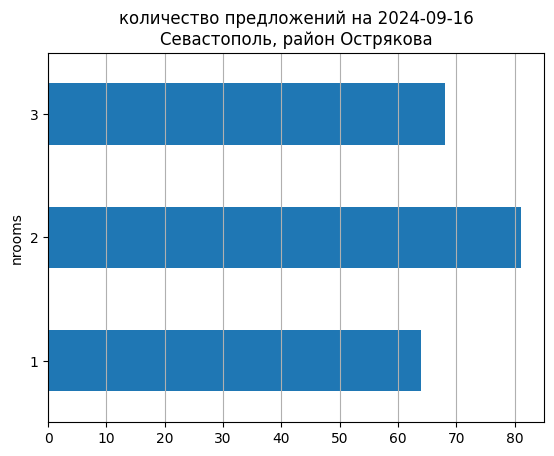

In [55]:
(
    gdf_last_local
    .drop_duplicates('url')
    .groupby(['nrooms'])['url'].count()
    .plot.barh(title='количество предложений на '+ str( dt_now ) + '\n' + ' / '.join(area_name) )
    .grid(axis='x')   
)

In [58]:
q_95 = gdf_last_local['priceM'].quantile(.95)

fig, ax = plt.subplots(figsize=(7,3) )
(
    gdf_last_local
    .query(f'(priceM<{q_95})')
    .drop_duplicates('url')
    .groupby(['nrooms'],observed=True)
    ['priceM'].plot.kde(legend=True,ax=ax,title='/'.join(area_name), grid=True)   
)

ax.set_xticks( np.arange(2, 16, step=1) )

fig.suptitle(f'распределение цены на квартиры на '+ str( dt_now ), fontsize=16)
fig.tight_layout()

----

In [59]:
# изменение цены по району
gdf_local = gdf.sjoin( frame_, how='inner', predicate='within') 

In [60]:
percentiles=[.01,.05,.1,.25,.5,.75,.9]
# stat = gdf_local.groupby(['nrooms','month'],observed=True)['priceM'].describe(percentiles=percentiles)
stat = gdf_local.groupby(['nrooms','week'],observed=True)['priceM'].describe(percentiles=percentiles)
# display( stat )

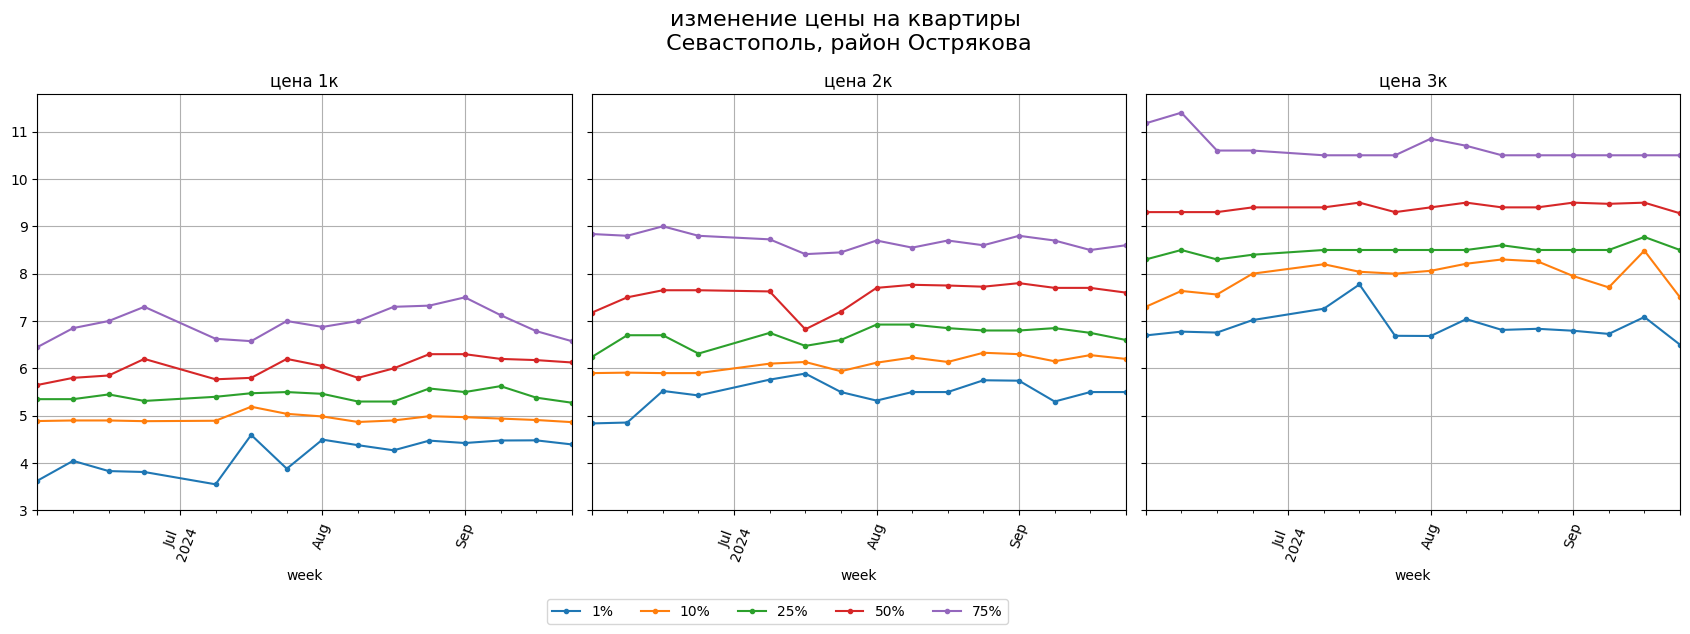

In [63]:
fig, ax = plt.subplots(1,len(sizes),figsize=(17,6), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(s),cols].plot(title=f'цена {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   
    ax[i].set_yticks( np.arange(3, 12, step=1) )

fig.suptitle(f'изменение цены на квартиры\n {'/'.join(area_name)}', fontsize=16)
fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()

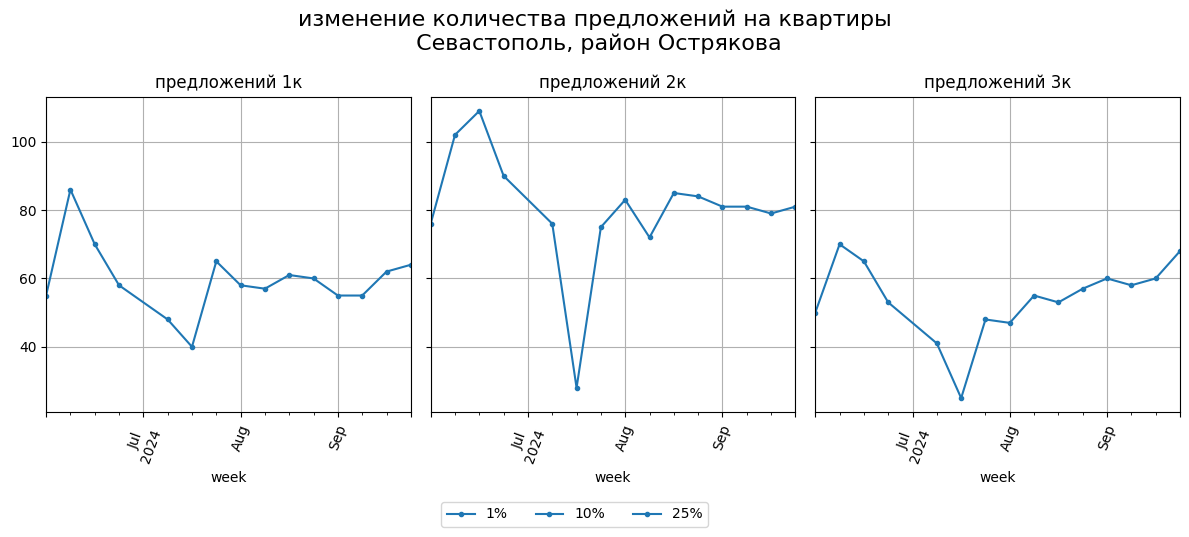

In [64]:
fig, ax = plt.subplots(1,len(sizes),figsize=(12,5), sharey=True )

for i,s in enumerate(sizes): 
    stat.loc[(s),'count'].plot(title=f'предложений {s}к', grid=True,ax=ax[i],legend=False, rot=70, style='.-' )   

fig.suptitle(f'изменение количества предложений на квартиры\n {'/'.join(area_name)}', fontsize=16)

fig.legend( labels=cols,frameon=True, ncol=len(cols), bbox_to_anchor=(0.6, 0.01))    
fig.tight_layout()